In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
model_path = '/content/drive/MyDrive/money.h5'


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model(model_path)
print("✅ Model loaded from Google Drive")
model.summary()


✅ Model loaded from Google Drive


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 439,752 (1.68 MB)

 Trainable params: 439,750 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
class_names = ['LKR_100', 'LKR_1000', 'LKR_20', 'LKR_50', 'LKR_500', 'LKR_5000']


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def predict_currency_note(image_path, model, class_names):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(img_rgb, (256, 256)) / 255.0

    prediction = model.predict(tf.expand_dims(resized, axis=0))[0]
    top_idx = np.argmax(prediction)

    # Show image with prediction
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Prediction: {class_names[top_idx]} ({prediction[top_idx]*100:.2f}%)")
    plt.show()

    # Show confidence for all classes
    for i, p in enumerate(prediction):
        print(f"{class_names[i]}: {p:.4f}")


In [ ]:
from google.colab import files
uploaded = files.upload()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


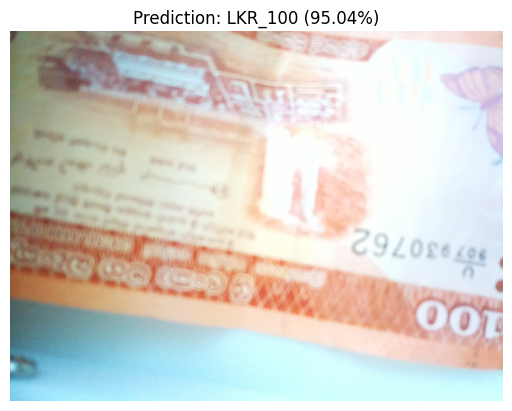

LKR_100: 0.9504
LKR_1000: 0.0010
LKR_20: 0.0289
LKR_50: 0.0093
LKR_500: 0.0049
LKR_5000: 0.0055


In [ ]:
image_path = list(uploaded.keys())[0]  # Get the uploaded file name
predict_currency_note(image_path, model, class_names)
